In [372]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.sparse import diags
from tqdm import tqdm
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

os.getcwd()

'/Users/jonnycodd/Documents/MASTERS/Networks/RecommendationSystems_NetworksFP/code'

# Load data

In [373]:
# Load bi-partide network
bi_partide_network =  pd.read_csv("../output/collbarfilter.csv")

bi_partide_network.drop(bi_partide_network.columns[0], axis=1, inplace=True)
bi_partide_network.reset_index(drop=True, inplace=True)
bi_partide_network[bi_partide_network.notna()] += 2.5 # Make all values positive
bi_partide_network = bi_partide_network.fillna(0)
bi_partide_network_sparse = csr_matrix(bi_partide_network)
bi_partide_network

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
# Create binary matrix 
binary_network = bi_partide_network.copy()
binary_network.iloc[:, 1:] = (binary_network.iloc[:, 1:] > 0).astype(int)
#binary_network = binary_network.fillna(0)

# Convert to sparse matrix
binary_network_sparse = csr_matrix(binary_network.values)

binary_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms

## With ratings

In [376]:
def probabilistic_spreading_with_ratings(user_item_matrix, user_index, K=9719):
    
    # Create vector of the movies the individual has seen and their ratings
    seen_movies = user_item_matrix[user_index, :]
    ratings = bi_partide_network_sparse[user_index, :].multiply(user_item_matrix[user_index, :])

    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_matrix.sum(axis=0)
    user_degree = user_item_matrix.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by their ratings and inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(ratings.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_matrix.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_matrix.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]

    return top_k_weights, top_k_indices, final_movie_weights_dense


In [377]:
weights, indices, _ = probabilistic_spreading_with_ratings(binary_network_sparse, 0, 10)

## Binary

In [378]:
def probabilistic_spreading_binary(user_item_sparse, user_index, K = 9719):
    
    # Create vector of the movies the individual has seen
    seen_movies = user_item_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]
    

    return top_k_weights,  top_k_indices, final_movie_weights_dense



In [379]:
weights, indices, _ = probabilistic_spreading_binary(binary_network_sparse, 0, 10)

In [380]:
weights

array([0.65101011, 0.55851196, 0.45469533, 0.44257122, 0.43470222,
       0.4281437 , 0.41608424, 0.41454562, 0.41378308, 0.3866272 ])

# Heat s

In [509]:
array = np.array([
[1, 0, 0, 1, 0],
[1, 1, 1, 1, 0],
[1, 0, 1, 0, 0],
[0, 0, 1, 0, 1]
])

sparse_array = csr_matrix(array)

# Find the indices of zeros in the first row
zero_indices = np.where(array[0] == 0)[0]

# Set the entire column to zero for each found index
resource_allocation = array.copy()
resource_allocation[:, zero_indices] = 0
resource_allocation

# Movie to user
movie_to_user = []
for i in range(len(array)):
    movie_to_user.append(resource_allocation[i].sum()/array[i].sum())

# User to movie
user_to_movie = []
for i in range(len(array[0])):
    user_to_movie.append((movie_to_user*array[:, i]).sum()/array[:, i].sum())
user_to_movie = np.array(user_to_movie)

# zero out movies seen before
one_indices = np.where(array[0] == 1)[0]
user_to_movie[one_indices] = 0

In [517]:
def heatS(sparse_array, user_index, K):
    # Convert sparse array to dense if necessary
    array = sparse_array.toarray()
    
    # Find the indices of zeros in the first row
    zero_indices = np.where(array[user_index] == 0)[0]
    
    # Set the entire column to zero for each found index
    resource_allocation = array.copy()
    resource_allocation[:, zero_indices] = 0
    
    # Movie to user
    movie_to_user = np.zeros(len(array))
    for i in range(len(array)):
        if array[i].sum() != 0:
            movie_to_user[i] = resource_allocation[i].sum() / array[i].sum()
    
    # User to movie
    user_to_movie = np.zeros(len(array[0]))
    for i in range(len(array[0])):
        if array[:, i].sum() != 0:
            user_to_movie[i] = np.dot(movie_to_user, array[:, i]) / array[:, i].sum()
    
    # Zero out movies seen before
    one_indices = np.where(array[user_index] == 1)[0]
    user_to_movie[one_indices] = 0
    
    # Get the indices of the top K values
    top_k_indices = np.argsort(user_to_movie)[-K:][::-1]
    
    # Select the K highest weights
    top_k_weights = user_to_movie[top_k_indices]
    
    return top_k_weights, top_k_indices, user_to_movie


In [522]:
w, i, um = heatS(sparse_array, 0, 5)

In [526]:
w, i, um = heatS_optimized(sparse_array, 0, 5)

/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [543]:
import numpy as np
from scipy.sparse import csr_matrix

def heatS_optimized(sparse_array, user_index, K = 9719):
    # Ensure working with a CSR format for efficient row slicing
    if not isinstance(sparse_array, csr_matrix):
        sparse_array = sparse_array.tocsr()
    
    zero_indices = np.where(sparse_array[user_index].toarray() == 0)[1]

    # Efficiently zero out columns for sparse matrix
    resource_allocation = sparse_array.copy()
    for zero_index in zero_indices:
        resource_allocation[:, zero_index] = 0
    
    # Compute movie_to_user as a dense array for efficiency
    user_sums = np.array(sparse_array.sum(axis=1)).flatten()
    movie_to_user = np.array(resource_allocation.sum(axis=1)).flatten() / user_sums
    movie_to_user[user_sums == 0] = 0  # Handle division by zero
    
    # Compute user_to_movie using dot product, ensuring we're dealing with dense arrays for division
    movie_sums = np.array(sparse_array.sum(axis=0)).flatten()
    user_to_movie = movie_to_user @ sparse_array / movie_sums
    user_to_movie[movie_sums == 0] = 0  # Handle division by zero
    
    # Zero out movies already rated by the user
    one_indices = sparse_array[user_index].nonzero()[1]
    user_to_movie[one_indices] = 0
    
    # Find top K indices
    top_k_indices = np.argsort(user_to_movie)[-K:][::-1]
    
    # Extract the corresponding weights
    top_k_weights = user_to_movie[top_k_indices]
    
    return top_k_weights, top_k_indices, user_to_movie


# Evaluate recommendations over time

In [381]:
# Define a function to plot the movie degree after different iterations
def movie_degree_rank_plot(movie_degrees, num_iterations):
    sorted_indices = np.argsort(movie_degrees)[::-1]
    sorted_degrees = movie_degrees[sorted_indices]
    ranks = np.arange(1, len(movie_degrees) + 1)

    # Plotting degree rank plot
    plt.plot(ranks, sorted_degrees, marker='o', linestyle='-', color='b')
    plt.title(f'Degree Rank Plot after {num_iterations} iterations')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.savefig(f'../figures/Prob S movie rank plot - {num_iterations} iterations')
    plt.show()


In [382]:
# Define a function to plot the movie degree after the algorithm has run
def plot_recomendation_counts(reccomendation_counts, num_iterations):
    
    # Example column labels from the bipartite network (replace it with your actual data)
    column_labels = bi_partide_network.columns

    # Get indices of nonzero movie degree values
    nonzero_indices = np.where(reccomendation_counts != 0)[0]

    # Filtered movie degree array and corresponding labels
    filtered_movie_degree = reccomendation_counts[nonzero_indices]
    filtered_column_labels = [column_labels[i] for i in nonzero_indices]

    # Sort filtered movie degree array and corresponding labels
    sorted_indices = np.argsort(filtered_movie_degree)[::-1]
    sorted_filtered_movie_degree = filtered_movie_degree[sorted_indices][:500]
    sorted_filtered_column_labels = [filtered_column_labels[i] for i in sorted_indices][:500]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_filtered_movie_degree)), sorted_filtered_movie_degree)
    # Removed xticks setting for labels
    plt.title(f'Recommendations count after {num_iterations} iterations')
    plt.ylabel('Recommendation Count')
    plt.xlabel('Rank')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(f'../figures/Prob S movie recommendations - {num_iterations} iterations')
    plt.show()

In [536]:
# Plot evoloution of reccomended movies over time
def temporal_recommendations(binary_network_sparse, iterations, plot_points = [], algorithm = probabilistic_spreading_binary):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in tqdm(range(binary_network_sparse.shape[0]), desc="user"):
            print(i)
            # Get index of top recommended film
            _, index,  _  = algorithm(binary_network_sparse, i, 1)
            recommendations.append((i, index[0]))
            reccomendation_counts[index[0]] += 1

        # Update matrix 
        row_indices, col_indices = zip(*recommendations)
        binary_network_sparse[row_indices, col_indices] = 1

        # Update movie degrees
        updated_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
        movie_degrees += updated_degrees - movie_degrees

        # Store degree information at plot_points iterations
        if j in plot_points:
            movie_degree_rank_plot(movie_degrees, j)
            plot_recomendation_counts(reccomendation_counts, j)


    return binary_network_sparse, movie_degrees, reccomendation_counts

In [533]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100], probabilistic_spreading_binary)

Progress:   0%|          | 0/100 [00:00<?, ?it/s]

h


Progress:   0%|          | 0/100 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [540]:
# Plot evoloution of reccomended movies over time
def temporal_recommendations_heat(binary_network_sparse, iterations, plot_points = []):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in tqdm(range(binary_network_sparse.shape[0]), desc="user"):
            print(i)
            # Get index of top recommended film
            _, index,  _  = heatS_optimized(binary_network_sparse, i, 1)
           

In [541]:
# Heat S
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations_heat(binary_network_sparse, 100, [1, 10, 100])

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


0


Progress:   0%|          | 0/100 [00:42<?, ?it/s]


KeyboardInterrupt: 

# Out of sample performance

In [ ]:
def train_test_split(df, perc):
    # Ensure `perc` is between 0 and 1
    perc = max(min(perc, 1), 0)

    train = df.copy()
    
    # Create the DataFrame for removed ratings with the same structure as `df`
    removed_ratings_df = pd.DataFrame(index=train.index, columns=train.columns)
    
    # Iterate over each user in the DataFrame
    for user in tqdm(train.index, desc = "Train-test split user: "):
        # Get indices of the non-NaN ratings for the user
        user_ratings = train.loc[user]
        non_nan_indices = user_ratings[user_ratings != 0].index
        
        # Calculate the number of ratings to remove for the user
        num_to_remove = int(len(non_nan_indices) * perc)
        
        # Randomly select indices (movies) to remove
        indices_to_remove = np.random.choice(non_nan_indices, size=num_to_remove, replace=False)
        
        # Set the selected ratings to NaN in `df` and move them to `removed_ratings_df`
        for movie in indices_to_remove:
            removed_ratings_df.at[user, movie] = train.at[user, movie]
            train.at[user, movie] = np.nan
    
    # Optionally, you can fill NaN values with 0 or another value in both DataFrames
    train.fillna(0, inplace=True)
    removed_ratings_df.fillna(0, inplace=True)
    
    return train, removed_ratings_df

First we create a data frame where a cell = 1 if the movie has above average rating for the user and 0 otherwise.

In [ ]:
bi_partide_network_pos_neg = pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_pos_neg.drop(bi_partide_network_pos_neg.columns[0], axis=1, inplace=True)
bi_partide_network_pos_neg.reset_index(drop=True, inplace=True)

# Calculate the mean of each row, ignoring NaNs
row_means = bi_partide_network_pos_neg.mean(axis=1, skipna=True)

# Copy the original DataFrame to maintain its structure and NaN values
pos_neg_network_df = bi_partide_network_pos_neg.copy()

# Iterate over each element and set to 1 if above row mean, else 0, maintaining NaNs
for i, row in pos_neg_network_df.iterrows():
    pos_neg_network_df.loc[i] = row.where(row.isna(), np.where(row > row_means[i], 1, 0))

pos_neg_network_df


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Binary algorithm network

In [353]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []
indices_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, indices, weights = probabilistic_spreading_binary(train_sparse, user_id)
    weights_list.append(weights)
    indices_list.append(indices)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/3546942668.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 414.13it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.002949,0.002993,0.002096,0.002327,0.002327,0.0,0.043423,0.002016,0.034567,0.010318,...,0.001485,0.014403,0.002404,0.002404,0.0,0.045477,0.033223,0.003584,0.000000,0.005522
1,0.000961,0.000330,0.000000,0.000000,0.000000,0.0,0.001090,0.000030,0.016599,0.000772,...,0.000424,0.001941,0.000360,0.000360,0.0,0.003385,0.003218,0.000941,0.004855,0.000000
2,0.001515,0.000446,0.005042,0.000000,0.000000,0.0,0.011021,0.000352,0.006200,0.000835,...,0.000530,0.003398,0.000977,0.000977,0.0,0.004488,0.004087,0.000644,0.006325,0.000470
3,0.003367,0.000995,0.001177,0.003308,0.003308,0.0,0.027968,0.002676,0.036085,0.007200,...,0.000952,0.007262,0.001546,0.001546,0.0,0.052101,0.022376,0.001988,0.043955,0.001755
4,0.000220,0.000214,0.000058,0.000000,0.000000,0.0,0.004480,0.000238,0.004633,0.001241,...,0.000070,0.001669,0.000172,0.000172,0.0,0.005192,0.003746,0.000838,0.005816,0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.018393,0.007548,0.009183,0.021559,0.021559,0.0,0.136176,0.019689,0.205047,0.045971,...,0.005860,0.048714,0.008620,0.008620,0.0,0.189646,0.139004,0.020015,0.176804,0.014503
606,0.002907,0.001253,0.001222,0.003500,0.003500,0.0,0.040741,0.001451,0.027385,0.009340,...,0.001024,0.013891,0.002118,0.002118,0.0,0.038193,0.027163,0.004893,0.047057,0.004888
607,0.023628,0.006613,0.004479,0.003984,0.003984,0.0,0.146586,0.005291,0.166054,0.055305,...,0.006914,0.066596,0.014856,0.014856,0.0,0.000000,0.000000,0.029538,0.176126,0.006152
608,0.000126,0.000171,0.000058,0.000000,0.000000,0.0,0.003634,0.000260,0.003141,0.002000,...,0.000086,0.001057,0.000125,0.000125,0.0,0.004660,0.002519,0.000509,0.003982,0.000186


In [354]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5681816598962643


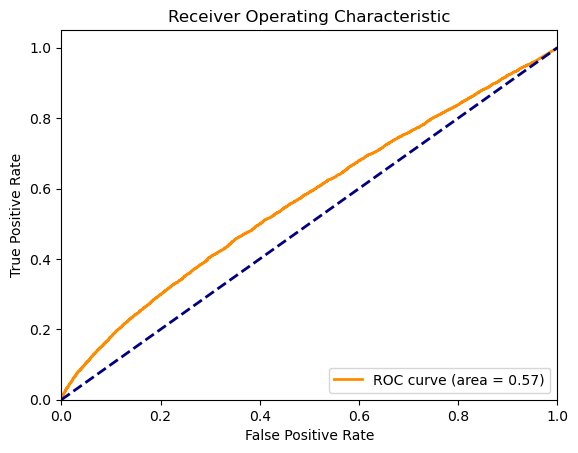

In [355]:
# Compute FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [356]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.6087232794509881


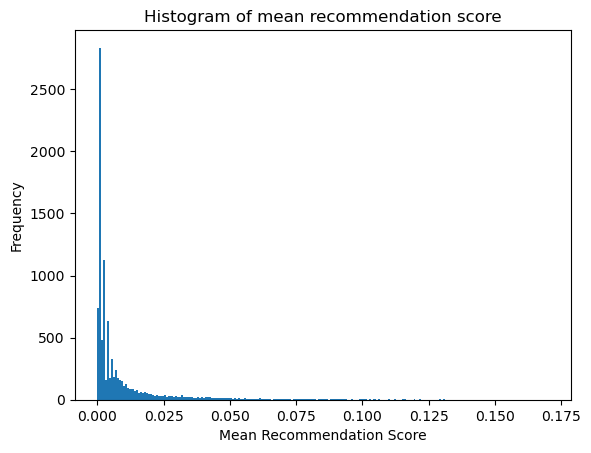

In [357]:
# Plot histogram of mean weights
column_means = weights_df.mean()

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of mean recommendation score')
plt.xlabel('Mean Recommendation Score')
plt.ylabel('Frequency')
plt.show() 

In [358]:
# Calculate mean successful prediction
mean_successful_prediction = []
mean_successful_prediction_from_seen = []

for i in range(len(indices_list)):
    column_indices=indices_list[i][:10] # top 10 reccomendations
    scores = pos_neg_network_df.iloc[i, column_indices] 

    # Calculate successful prediction
    mean_successful_prediction.append(scores.sum()/10)
    if scores.count() > 0:
        mean_successful_prediction_from_seen.append(scores.sum() / scores.count())

In [359]:
np.mean(mean_successful_prediction)

0.16442622950819674

In [360]:
np.mean(mean_successful_prediction_from_seen)

0.6942144261834527

# Heat S

In [544]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []
indices_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, indices, weights = heatS_optimized(train_sparse, user_id, )
    weights_list.append(weights)
    indices_list.append(indices)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Computing metrics:   0%|          | 0/610 [00:30<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

## Algorithm with ratings

In [361]:
# Train test split 
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, _, weights = probabilistic_spreading_with_ratings(train_sparse, user_id)
    weights_list.append(weights)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/276921209.py:13: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 411.43it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.011454,0.010032,0.017650,0.010238,0.014880,0.006206,0.141583,0.008431,0.139190,0.103534,...,0.006382,0.053641,0.010183,0.010862,0.0,0.177339,0.171812,0.017559,0.000000,0.0
1,0.002411,0.000781,0.000781,0.000000,0.000000,0.001316,0.003668,0.000045,0.055546,0.003646,...,0.000848,0.003426,0.002825,0.001160,0.0,0.013866,0.016547,0.003322,0.018269,0.0
2,0.000563,0.000785,0.025240,0.000000,0.000095,0.000101,0.010031,0.000156,0.004757,0.002587,...,0.001651,0.005483,0.000453,0.000716,0.0,0.015674,0.007080,0.001803,0.015698,0.0
3,0.011726,0.005707,0.007560,0.012307,0.025383,0.001443,0.081858,0.009830,0.109399,0.055090,...,0.002428,0.016269,0.006804,0.005093,0.0,0.126098,0.087726,0.013124,0.175351,0.0
4,0.000491,0.001145,0.002363,0.000462,0.001673,0.000490,0.013497,0.000755,0.017558,0.005063,...,0.000348,0.006207,0.000733,0.000603,0.0,0.016245,0.017509,0.003757,0.024517,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.054410,0.034097,0.060165,0.066261,0.069091,0.016571,0.367573,0.086884,0.709361,0.199918,...,0.016557,0.135300,0.031725,0.028426,0.0,0.646987,0.551288,0.077116,0.758615,0.0
606,0.007578,0.005550,0.009292,0.007043,0.007140,0.002669,0.098154,0.005530,0.096894,0.086450,...,0.003629,0.048519,0.007708,0.007370,0.0,0.120404,0.123273,0.018389,0.208290,0.0
607,0.087614,0.023190,0.043887,0.013956,0.014107,0.015129,0.292050,0.018526,0.497759,0.221533,...,0.019759,0.197489,0.043107,0.050727,0.0,0.000000,0.000000,0.102807,0.587159,0.0
608,0.000365,0.001030,0.001202,0.000000,0.000119,0.000355,0.006372,0.000180,0.011266,0.006677,...,0.000240,0.003956,0.000915,0.000373,0.0,0.012755,0.010050,0.001674,0.013439,0.0


In [362]:
weights_df = weights_df.div(weights_df.max(axis=1), axis=0)
weights_df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.004921,0.004310,0.007584,0.004399,0.006393,0.002666,0.060834,0.003622,0.059806,0.044485,...,0.002742,0.023048,0.004375,0.004667,0.0,0.076198,0.073823,0.007544,0.000000,0.0
1,0.006009,0.001947,0.001947,0.000000,0.000000,0.003279,0.009142,0.000112,0.138445,0.009088,...,0.002114,0.008540,0.007041,0.002891,0.0,0.034561,0.041242,0.008281,0.045535,0.0
2,0.002960,0.004121,0.132580,0.000000,0.000497,0.000528,0.052691,0.000817,0.024989,0.013590,...,0.008672,0.028800,0.002379,0.003760,0.0,0.082329,0.037188,0.009472,0.082457,0.0
3,0.006466,0.003147,0.004169,0.006786,0.013997,0.000796,0.045140,0.005420,0.060327,0.030379,...,0.001339,0.008971,0.003752,0.002808,0.0,0.069535,0.048376,0.007237,0.096695,0.0
4,0.000531,0.001237,0.002552,0.000498,0.001807,0.000529,0.014576,0.000815,0.018961,0.005468,...,0.000376,0.006703,0.000792,0.000651,0.0,0.017544,0.018908,0.004057,0.026476,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.008741,0.005478,0.009666,0.010645,0.011100,0.002662,0.059054,0.013959,0.113965,0.032119,...,0.002660,0.021737,0.005097,0.004567,0.0,0.103944,0.088569,0.012389,0.121878,0.0
606,0.003640,0.002666,0.004464,0.003383,0.003430,0.001282,0.047151,0.002656,0.046546,0.041529,...,0.001743,0.023308,0.003703,0.003540,0.0,0.057839,0.059218,0.008834,0.100058,0.0
607,0.017502,0.004632,0.008767,0.002788,0.002818,0.003022,0.058341,0.003701,0.099434,0.044254,...,0.003947,0.039451,0.008611,0.010133,0.0,0.000000,0.000000,0.020537,0.117293,0.0
608,0.000720,0.002034,0.002372,0.000000,0.000234,0.000701,0.012578,0.000355,0.022237,0.013179,...,0.000473,0.007808,0.001807,0.000737,0.0,0.025175,0.019837,0.003304,0.026525,0.0


In [363]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5891605625599874


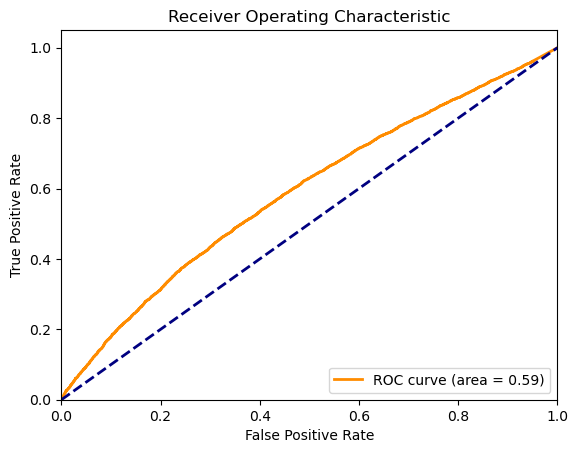

In [364]:
# Calculate the AUC
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [365]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.6246927779047552


In [366]:
weights_df.iloc[0]

'71 (2014)                                   0.004921
'Hellboy': The Seeds of Creation (2004)      0.004310
'Round Midnight (1986)                       0.007584
'Salem's Lot (2004)                          0.004399
'Til There Was You (1997)                    0.006393
                                               ...   
eXistenZ (1999)                              0.076198
xXx (2002)                                   0.073823
xXx: State of the Union (2005)               0.007544
¡Three Amigos! (1986)                        0.000000
À nous la liberté (Freedom for Us) (1931)    0.000000
Name: 0, Length: 9719, dtype: float64

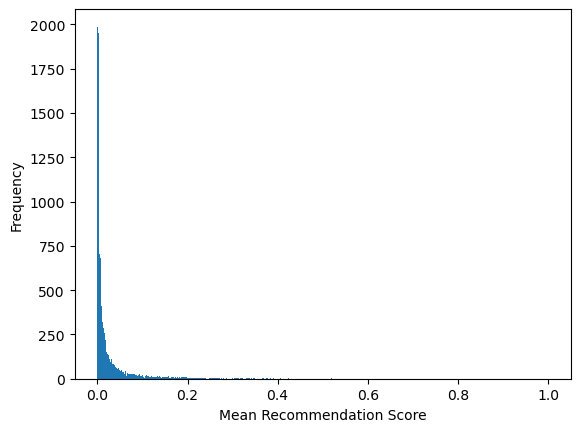

In [367]:
# Plot histogram of mean weights
column_means = weights_df.iloc[0]

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.xlabel('Mean Recommendation Score')
plt.ylabel('Frequency')
plt.show() 

## Recommending highest rated movies

In [368]:
bi_partide_network_highrated= pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_highrated.drop(bi_partide_network_highrated.columns[0], axis=1, inplace=True)
bi_partide_network_highrated.reset_index(drop=True, inplace=True)

# make all positive
bi_partide_network_highrated += 2.5
bi_partide_network_highrated 

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
# Train test split 
train, test = train_test_split(bi_partide_network_highrated, 0.2)

Train-test split user:  68%|██████▊   | 415/610 [00:19<00:09, 20.91it/s]


KeyboardInterrupt: 

In [ ]:
train = train.replace(0, np.nan)

In [ ]:
column_means = train.mean()

# Replace each column with its mean
for column in train.columns:
    train[column] = column_means[column]

In [ ]:
train = train.replace(np.nan, 0)
train = train/5
train

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
1,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
2,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
3,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
4,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
606,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
607,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
608,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2


In [ ]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = train.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat !=0
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.6707542604674138


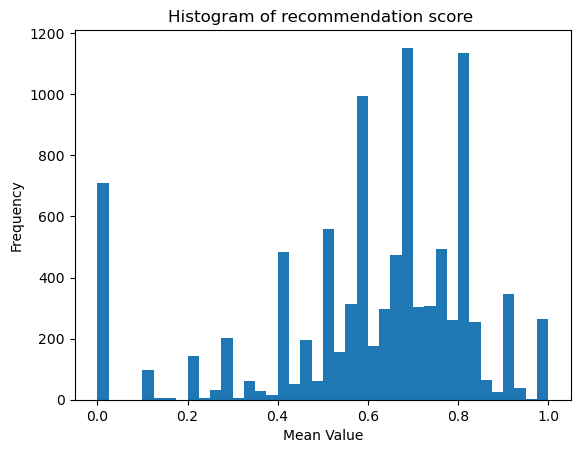

In [ ]:
# Plot histogram of mean weights
column_means = train.mean()

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of recommendation score ')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show() 

In [ ]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.674957720180299
